Import Statements

In [213]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import date2num 

Importing the dataframe

Converting the date to datetime from string

Displaying the first 5 entries in the csv file

In [214]:
df = pd.read_csv('transactions.csv')
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.head()

,amount,account_id,memo,transaction_date,processed_Memo,name
0,554,jmbNEr76Pkt50YbKqK09f7evaM980EFR0wQ5A,Starbucks,2018-12-31,starbucks,credit card
1,4520,jmbNEr76Pkt50YbKqK09f7evaM980EFR0wQ5A,PURSUIT INC ETOBICOKE ON,2018-12-31,pursuit inc etobicoke on,credit card
2,1808,jmbNEr76Pkt50YbKqK09f7evaM980EFR0wQ5A,WEST ELM 0917 TORONTO ON,2018-12-31,west elm toronto on,credit card
3,-7100,jmbNEr76Pkt50YbKqK09f7evaM980EFR0wQ5A,PAYMENT - THANK YOU / PAIEMENT - MERCI,2018-12-31,payment thank you paiement merci,credit card
4,1433,jmbNEr76Pkt50YbKqK09f7evaM980EFR0wQ5A,CINEPLEX 7260 QPS ETOBICOKE ON,2018-12-31,cineplex qps etobicoke on,credit card


Two functions for plotting:

1. plot_name takes in the df and displays the amount spend per account type
2. plot_account takes in the df and displays the amount spend per account

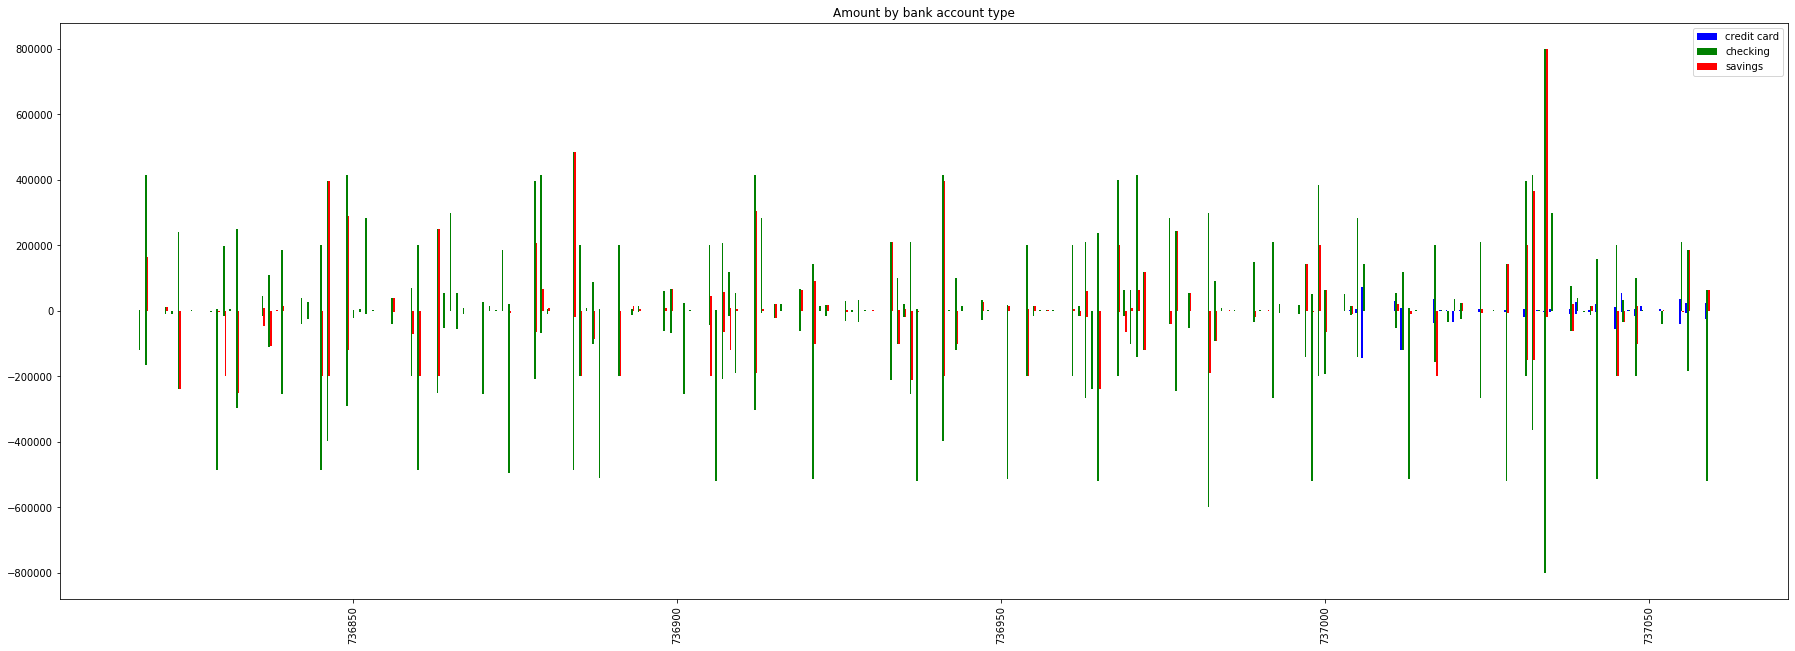

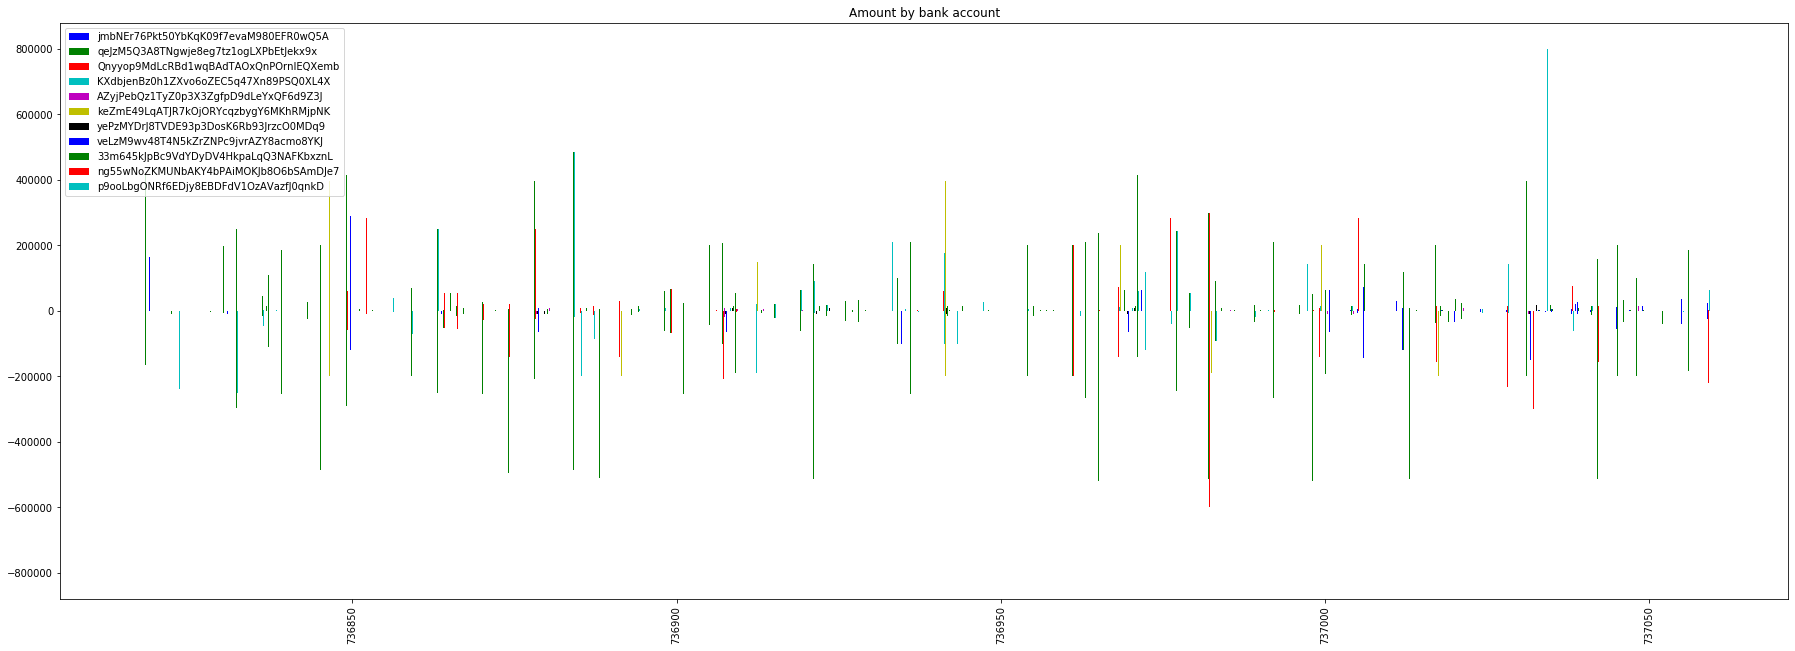

In [215]:
def plot_name(df):
    names = df.name.unique()
    data = []
    for name in names:
        name_index = df[df['name'] == name].index
        amount = df.iloc[name_index]['amount']
        date = df.iloc[name_index]['transaction_date']
        data.append([date, amount])
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,4,2])
    ax.bar(date2num(data[0][0]) - 0.25, data[0][1], color = 'b', width = 0.25)
    ax.bar(date2num(data[1][0]), data[1][1], color = 'g', width = 0.25)
    ax.bar(date2num(data[2][0]) + 0.25, data[2][1], color = 'r', width = 0.25)
    ax.xaxis.set_tick_params(rotation = 90)
    ax.legend(labels = names)
    ax.set_title('Amount by bank account type')
    
def plot_account(df):
    colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'y', 6:'k', 7: 'w'}
    accounts = df.account_id.unique()
    data = []
    for account in accounts:
        account_index = df[df['account_id'] == account].index
        amount = df.iloc[account_index]['amount']
        date = df.iloc[account_index]['transaction_date']
        data.append([date, amount])
        
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 4, 2])
    for i in range(len(data)):
        ax.bar(date2num(data[i][0]) + i * 0.1, data[i][1], color = colors[i % 7], width = 0.1)
    ax.xaxis.set_tick_params(rotation = 90)
    ax.legend(labels = accounts)
    ax.set_title('Amount by bank account')
    
plot_name(df)
plot_account(df)

Function get_card_types displays which account belongs to which account type in a dictionary

In [216]:
df = pd.read_csv('transactions.csv')
'''
card_type: {
    credit: ['jmbNEr76Pkt50YbKqK09f7evaM980EFR0wQ5A'],
    
    checking: ['qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x', 'Qnyyop9MdLcRBd1wqBAdTAOxQnPOrnIEQXemb',
               'yePzMYDrJ8TVDE93p3DosK6Rb93JrzcO0MDq9', '33m645kJpBc9VdYDyDV4HkpaLqQ3NAFKbxznL' ],
    
    savings: ['KXdbjenBz0h1ZXvo6oZEC5q47Xn89PSQ0XL4X', 'AZyjPebQz1TyZ0p3X3ZgfpD9dLeYxQF6d9Z3J', 
             'keZmE49LqATJR7kOjORYcqzbygY6MKhRMjpNK', 'veLzM9wv48T4N5kZrZNPc9jvrAZY8acmo8YKJ', 
             'ng55wNoZKMUNbAKY4bPAiMOKJb8O6bSAmDJe7', 'p9ooLbgONRf6EDjy8EBDFdV1OzAVazfJ0qnkD']
}
'''
def get_card_types(df):
    card_type = {}
    names = df.name.unique()
    for name in names:
        card_type[name] = []

    accounts = df.account_id.unique()
    for account in accounts:
        row = df.loc[df['account_id'] == account]
        card_type[row['name'].unique()[0]].append(account)
    print(card_type)
get_card_types(df)

{'credit card': ['jmbNEr76Pkt50YbKqK09f7evaM980EFR0wQ5A'], 'checking': ['qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x', 'Qnyyop9MdLcRBd1wqBAdTAOxQnPOrnIEQXemb', 'yePzMYDrJ8TVDE93p3DosK6Rb93JrzcO0MDq9', '33m645kJpBc9VdYDyDV4HkpaLqQ3NAFKbxznL'], 'savings': ['KXdbjenBz0h1ZXvo6oZEC5q47Xn89PSQ0XL4X', 'AZyjPebQz1TyZ0p3X3ZgfpD9dLeYxQF6d9Z3J', 'keZmE49LqATJR7kOjORYcqzbygY6MKhRMjpNK', 'veLzM9wv48T4N5kZrZNPc9jvrAZY8acmo8YKJ', 'ng55wNoZKMUNbAKY4bPAiMOKJb8O6bSAmDJe7', 'p9ooLbgONRf6EDjy8EBDFdV1OzAVazfJ0qnkD']}


Function clean_data removes all non income expenditure.

Steps I took:
1. Removed all credit card payments
2. Removed all savings (I assumed this person does not have incomes sent there)
3. Removed all positive amounts as they are expenses and incoming amounts less than 100, as I assumed those are too small to count as incomes
4. Using the information I received from you, removed other unnecessary items like WWW, RBC, MISC etc
5. Removed all other rows that do not include payroll or interac in the memo
6. Reset index of the dataframe
7. Divided the amount by 100 to get dollar values

In [217]:
df = pd.read_csv('transactions.csv')
def clean_data(df):
    index_credit = df[df['name'] == 'credit card'].index
    df = df.drop(index_credit , inplace = False)
    
    index_savings = df[df['name'] == 'savings'].index
    df = df.drop(index_savings , inplace = False)
    
    index_pos = df[df['amount'] >= -10000].index
    df = df.drop(index_pos , inplace = False)
    
    df = df[~df.memo.str.contains('WWW')]
    df = df[~df.memo.str.contains('RBC')]
    df = df[~df.memo.str.contains('INTEREST')]
    df = df[~df.memo.str.contains('PTB')]
    df = df[~df.memo.str.contains('MOBILE')]
    df = df[~df.memo.str.contains('MISC')]
    df = df[~df.memo.str.contains('TF')]
    df = df.drop(df[(df.memo.str.contains('PAYROLL')) & (df.memo.str.contains('INTERAC'))].index)
    
    df.reset_index(drop = True, inplace = True)
    
    df['amount'] = df['amount'].div(100)
    
    return df
df = clean_data(df)
# df.to_csv('file_name.csv')
df

,amount,account_id,memo,transaction_date,processed_Memo,name
0,-5215.09,qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x,PAYROLL DEPOSIT -IDS MANAGEMENT,2018-12-31 00:00:00,payroll deposit ids management,checking
1,-2200.00,Qnyyop9MdLcRBd1wqBAdTAOxQnPOrnIEQXemb,INTERAC E-TRANSFER RECEIVED 201836518145652A2,2018-12-31 00:00:00,interac e transfer received a,checking
2,-5139.52,qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x,PAYROLL DEPOSIT -IDS MANAGEMENT,2018-12-14 00:00:00,payroll deposit ids management,checking
3,-1575.00,Qnyyop9MdLcRBd1wqBAdTAOxQnPOrnIEQXemb,INTERAC E-TRANSFER RECEIVED 20183481503FBD494,2018-12-14 00:00:00,interac e transfer received fbd,checking
4,-621.21,qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x,INTERAC E-TRF- 4229,2018-12-06 00:00:00,interac e trf,checking
...,...,...,...,...,...,...
82,-4852.79,qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x,PAYROLL DEPOSIT -IDS MANAGEMENT,2018-05-31 00:00:00,payroll deposit ids management,checking
83,-4873.12,qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x,PAYROLL DEPOSIT -IDS MANAGEMENT,2018-05-15 00:00:00,payroll deposit ids management,checking
84,-300.00,qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x,INTERAC E-TRF- 6036,2018-05-03 00:00:00,interac e trf,checking
85,-1200.00,qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x,INTERAC E-TRF- 9223,2018-05-03 00:00:00,interac e trf,checking


The resulting dataframe has only incoming payments to 2 accounts. 

Most come in on a bi weekly basis, which matches most payments

All amounts are less that $6000

In [218]:
income_accounts = df.account_id.unique()
print(accounts)
print((df['amount'] < -600000).any())

['qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x'
 'Qnyyop9MdLcRBd1wqBAdTAOxQnPOrnIEQXemb']
False


To check if an incoming amount is an income or not we just need to reverse the process:
1. Has to be coming to one of the 2 checking accounts
2. Has to contain PAYROLL or INTERAC in the memo
3. Has to be and the end or middle of the month (plus or minus 3 days). This is done in check_date
4. Less than $6000, but not a hard limit, as income from work has increased in the 6 months

In [219]:
def check_date(date, epsilon = 3):
    day = date.dt.day
    day_range = []
    day_range.append(np.arange(1, 1 + epsilon + 1))
    day_range.append(np.arange(15, 15 + epsilon + 1))
    day_range.append(np.arange(15, 15 - epsilon - 1, -1))
    day_range.append(np.arange(31, 31 - epsilon - 2, -1))
    day_range = np.concatenate(day_range, axis = 0)
    if day in day_range: return True
    return False

def is_income(incoming_amount):
    amount = incoming_amount['amount'].values[0]
    account_id = incoming_amount['account_id'].values[0]
    memo = incoming_amount['memo'].values[0]
    date = pd.to_datetime(incoming_amount['transaction_date'])
    name = incoming_amount['name'].values[0]

    if (name == 'checking' and amount < -10000
        and (accound_id == 'qeJzM5Q3A8TNgwje8eg7tz1ogLXPbEtJekx9x' or account_id == 'Qnyyop9MdLcRBd1wqBAdTAOxQnPOrnIEQXemb') 
        and ('PAYROLL' in memo or 'INTERAC' in memo) 
        and check_date(date)):
        print('Transaction is an income')
    print('Transaction is not an income')

incoming_amount = pd.read_csv('transactions.csv').sample()
is_income(incoming_amount)   
        

Transaction is not an income
